# Script description

This is a script used in the publication: Walther R, Lancaster C, Burden J, Pichaud F 'A Dystroglycan-Laminin-Integrin axis controls cell basal geometry remodeling in the developing Drosophila retina'

This script takes the original cell shape descriptors from Cell Pose segmentation and Napari based regionprops analysis and compares accross genotypes to generate box plots

In [1]:
#Import packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from scipy import stats
import scipy as sp
import glob

In [3]:
#read datafiles
#Set file directory
os.chdir('/Users/courtneylancaster/Documents/PhD/Data_analysis/Basal_segmentation_quantification/Revision/databases_final')
print(os.getcwd())

/Users/courtneylancaster/Documents/PhD/Data_analysis/Basal_segmentation_quantification/Revision/databases_final


In [4]:
#list all csv files
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['Dg_ID3_measurements_scaled.csv',
 'data_check.csv',
 'ID3_LanB1_sg_measurements_scaled.csv',
 'ID2_Dg_GFP_GFPIR_measurements_scaled.csv',
 'ID12_wt_measurements_scaled.csv',
 'ID8_Dys_measurements_scaled.csv',
 'ID7_Dys_measurements_scaled.csv',
 'ID2_GFP_RNAi_DysGFP_measurements_scaled.csv',
 'ID3_GFP_RNAi_Dys_Mimic_measurements_scaled.csv',
 'ID2_LanB1_sg_measurements_scaled.csv',
 'ID1_Dys_measurements_scaled.csv',
 'Dg_ID2_measurements_scaled.csv',
 'ID1_GFP_RNAi_DysGFP_measurements_scaled.csv',
 'ID9_wt_measurements_scaled.csv',
 'Dg_ID1_measurements_scaled.csv',
 'ID1_Dg_GFP_GFPIR_measurements_scaled.csv',
 'ID1_LanB1_sg_measurements_scaled.csv',
 'ID3_DgGFP_GFPIR_measurements_scaled.csv',
 'ID10_wt_measurements_scaled.csv']

In [6]:
df_append = pd.DataFrame()
#append all files together
for file in csv_files:
            df_temp = pd.read_csv(file)
            df_append = df_append.append(df_temp, ignore_index=True)
            
          

/var/folders/3y/420x_hf969jg2fpzbq6qnny80000gn/T/ipykernel_86731/2731712149.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
/var/folders/3y/420x_hf969jg2fpzbq6qnny80000gn/T/ipykernel_86731/2731712149.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
/var/folders/3y/420x_hf969jg2fpzbq6qnny80000gn/T/ipykernel_86731/2731712149.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
/var/folders/3y/420x_hf969jg2fpzbq6qnny80000gn/T/ipykernel_86731/2731712149.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

In [8]:
#Drop unwanted columns from dataframe and save it as a new dataframe
drop_columns = ['area_pixels','label','bbox_area','convex_area','equivalent_diameter','max_intensity',
               'mean_intensity', 'min_intensity','perimeter_pixels','perimeter_crofton','local_centroid-0',
               'local_centroid-1','standard_deviation_intensity']


df_reduced=df_append.drop(columns=drop_columns)

df_reduced

#Drop the last column which is duplicated
df_reduced=df_reduced.iloc[: , :-4]

df_reduced

,Unnamed: 0,extent,solidity,feret_diameter_max,major_axis_length,minor_axis_length,orientation,eccentricity,aspect_ratio,roundness,circularity,frame,index,perimeter,area,cell_shape_index,cell_type,id
0,0,0.572937,0.892581,91.137259,81.109958,45.273228,-0.215583,0.829726,1.791566,0.514612,0.496342,0,1,18.310878,13.243090,5.031697,bristle,Dg_IR
1,1,0.560650,0.886430,145.578158,131.225294,72.207942,0.888210,0.834994,1.817325,0.515357,0.507001,0,2,29.332726,34.713930,4.978523,secondary,Dg_IR
2,2,0.572533,0.856944,63.324561,59.526565,44.383640,1.225844,0.666382,1.341183,0.665112,0.527741,0,3,14.816070,9.218864,4.879713,bristle,Dg_IR
3,3,0.658951,0.896588,85.070559,80.251412,57.455235,1.465259,0.698161,1.396764,0.675340,0.590601,0,4,19.026203,17.013312,4.612726,bristle,Dg_IR
4,4,0.579556,0.859800,69.971423,66.284542,37.426430,1.062370,0.825342,1.771062,0.522494,0.528192,0,5,14.616461,8.979801,4.877630,NaN,Dg_IR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12139,261,0.702621,0.862563,107.935166,101.729503,76.885278,-1.569145,0.654824,1.323134,0.718873,0.578835,0,286,25.135132,29.100932,4.659376,NaN,wild_type
12140,262,0.811577,0.905782,190.517716,203.694145,66.651033,-1.553588,0.944951,3.056129,0.315369,0.493136,0,287,36.115210,51.184370,5.048025,secondary,wild_type
12141,263,0.722795,0.891782,53.366656,52.276890,38.472184,-1.491580,0.677057,1.358823,0.717948,0.655018,0,288,12.134315,7.674916,4.380044,NaN,wild_type
12142,264,0.500000,0.769231,5.830952,6.774468,2.338072,-0.626400,0.938555,2.897460,0.277434,1.256637,0,290,0.705725,0.049805,3.162278,NaN,wild_type


In [9]:
#Deletes rows with NA. This is for cell types that can't be assigned

df_dropped=df_reduced.dropna()
df_dropped




,Unnamed: 0,extent,solidity,feret_diameter_max,major_axis_length,minor_axis_length,orientation,eccentricity,aspect_ratio,roundness,circularity,frame,index,perimeter,area,cell_shape_index,cell_type,id
0,0,0.572937,0.892581,91.137259,81.109958,45.273228,-0.215583,0.829726,1.791566,0.514612,0.496342,0,1,18.310878,13.243090,5.031697,bristle,Dg_IR
1,1,0.560650,0.886430,145.578158,131.225294,72.207942,0.888210,0.834994,1.817325,0.515357,0.507001,0,2,29.332726,34.713930,4.978523,secondary,Dg_IR
2,2,0.572533,0.856944,63.324561,59.526565,44.383640,1.225844,0.666382,1.341183,0.665112,0.527741,0,3,14.816070,9.218864,4.879713,bristle,Dg_IR
3,3,0.658951,0.896588,85.070559,80.251412,57.455235,1.465259,0.698161,1.396764,0.675340,0.590601,0,4,19.026203,17.013312,4.612726,bristle,Dg_IR
5,5,0.712932,0.929168,106.733313,107.097406,64.066773,1.443333,0.801339,1.671653,0.567914,0.590925,0,6,23.277677,25.480124,4.611465,tertiary,Dg_IR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12132,254,0.777474,0.957025,66.068147,62.481235,53.477800,-0.443480,0.517138,1.168358,0.835258,0.715297,0,277,14.969323,12.755004,4.191427,bristle,wild_type
12133,255,0.694178,0.787303,97.169954,98.387779,52.104999,-1.487987,0.848255,1.888260,0.446942,0.489332,0,278,20.847333,16.923663,5.067611,bristle,wild_type
12134,256,0.681460,0.809482,174.413302,187.303573,49.658163,-1.558562,0.964215,3.771859,0.232381,0.421700,0,279,30.826931,31.889999,5.458874,secondary,wild_type
12136,258,0.769382,0.880698,198.176689,211.133780,64.159441,-1.563230,0.952710,3.290767,0.291394,0.505648,0,283,35.535227,50.810834,4.985181,secondary,wild_type


In [10]:
#Split dataframe for cell types 

secondary=df_dropped[df_dropped["cell_type"]=='secondary']

tertiary=df_dropped[df_dropped["cell_type"]=='tertiary']

secondary

,Unnamed: 0,extent,solidity,feret_diameter_max,major_axis_length,minor_axis_length,orientation,eccentricity,aspect_ratio,roundness,circularity,frame,index,perimeter,area,cell_shape_index,cell_type,id
1,1,0.560650,0.886430,145.578158,131.225294,72.207942,0.888210,0.834994,1.817325,0.515357,0.507001,0,2,29.332726,34.713930,4.978523,secondary,Dg_IR
6,6,0.637718,0.927345,86.977008,81.176583,56.316185,0.212508,0.720217,1.441443,0.678197,0.583621,0,7,19.401205,17.481477,4.640231,secondary,Dg_IR
12,12,0.578059,0.896890,135.074054,123.638417,79.426496,-0.484162,0.766362,1.556639,0.624523,0.541531,0,15,29.437546,37.343622,4.817186,secondary,Dg_IR
18,18,0.528555,0.811270,140.117808,128.735979,61.370871,-0.387780,0.879056,2.097672,0.418089,0.407735,0,21,28.902199,27.103760,5.551574,secondary,Dg_IR
20,20,0.677213,0.947583,128.968989,118.326671,76.908019,0.664630,0.759965,1.538548,0.634565,0.608640,0,23,26.787101,34.753774,4.543858,secondary,Dg_IR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12124,246,0.516094,0.800091,234.232790,222.808910,68.530831,-1.400477,0.951523,3.251221,0.271402,0.375831,0,265,41.978603,52.703416,5.782406,secondary,wild_type
12130,252,0.636865,0.857457,216.363121,211.998618,59.463873,-1.459959,0.959856,3.565167,0.265167,0.370854,0,275,39.744500,46.617272,5.821081,secondary,wild_type
12134,256,0.681460,0.809482,174.413302,187.303573,49.658163,-1.558562,0.964215,3.771859,0.232381,0.421700,0,279,30.826931,31.889999,5.458874,secondary,wild_type
12136,258,0.769382,0.880698,198.176689,211.133780,64.159441,-1.563230,0.952710,3.290767,0.291394,0.505648,0,283,35.535227,50.810834,4.985181,secondary,wild_type


In [32]:
#Split secondary and tertiary datasets into comparison datasets

#Subset dataframe for each cell type into genotypes
#Set 1: Wt, DysIR\DysGFP
#Set 2: Wt, DysIR\DgIR
#Set 3: Wt, DgIR\DgGFP
#Set 4: Wt, DysGFP\DgGFP

values1= ['wild_type','Dys_IR','GFP_IR_DysGFP']
values2= ['wild_type','Dys_IR','Dg_IR']
values3= ['wild_type','Dg_IR','GFP_IR_DgGFP']
values4= ['wild_type','GFP_IR_DysGFP','GFP_IR_DgGFP']

secondary_Dys= secondary[secondary['id'].isin(values1)]

secondary_Dys_Dg= secondary[secondary['id'].isin(values2)]

secondary_Dg= secondary[secondary['id'].isin(values3)]

secondary_GFPs= secondary[secondary['id'].isin(values4)]


tertiary_Dys= tertiary[tertiary['id'].isin(values1)]

tertiary_Dys_Dg= tertiary[tertiary['id'].isin(values2)]

tertiary_Dg= tertiary[tertiary['id'].isin(values3)]

tertiary_GFPs= tertiary[tertiary['id'].isin(values4)]

tertiary_Dys

,Unnamed: 0,extent,solidity,feret_diameter_max,major_axis_length,minor_axis_length,orientation,eccentricity,aspect_ratio,roundness,circularity,frame,index,perimeter,area,cell_shape_index,cell_type,id
1300,0,0.247905,0.493950,165.469030,123.930942,107.314172,1.025391,0.500184,1.154842,0.480567,0.260711,0,1,37.304629,28.871830,6.942655,tertiary,wild_type
1304,4,0.273613,0.542594,179.780422,130.509865,111.130195,-0.266340,0.524342,1.174387,0.510407,0.280882,0,5,39.005461,34.006702,6.688722,tertiary,wild_type
1307,7,0.291825,0.547066,178.619708,135.056428,122.784396,-0.234247,0.416504,1.099948,0.514804,0.298259,0,8,39.339123,36.731023,6.490948,tertiary,wild_type
1310,10,0.259040,0.500239,182.603395,135.697954,129.486313,-0.318229,0.299091,1.047971,0.507251,0.266310,0,12,41.521855,36.536785,6.869286,tertiary,wild_type
1312,12,0.280516,0.536522,170.176379,127.665886,109.480443,-0.090741,0.514393,1.166107,0.485436,0.290009,0,14,36.620182,30.948689,6.582629,tertiary,wild_type
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12063,185,0.340591,0.647257,178.756818,142.101606,115.040209,1.445238,0.587033,1.235234,0.520762,0.362622,0,199,37.755218,41.133766,5.886779,tertiary,wild_type
12068,190,0.270595,0.512539,170.844959,131.872511,106.408805,1.102323,0.590679,1.239301,0.484831,0.277692,0,204,38.632537,32.980724,6.727027,tertiary,wild_type
12100,222,0.291434,0.563897,174.416169,130.933312,120.052417,-1.558445,0.399123,1.090635,0.558431,0.303973,0,240,39.346216,37.448212,6.429651,tertiary,wild_type
12105,227,0.288674,0.553101,194.650970,140.245382,135.646144,1.516049,0.253994,1.033906,0.583578,0.300917,0,245,43.301214,44.899007,6.462219,tertiary,wild_type


In [14]:
def boxplot2(x1, y1, dataframe, font, label, saveopt, filename,genotype_labels,labels1):

   fig = plt.figure(figsize = (6,5))
   ax1= fig.add_subplot(1,1,1)

   ax1.tick_params(width=2)

   for axis in ['top','bottom','left','right']:
       ax1.spines[axis].set_linewidth(2)

   sns.boxplot(x=x1 , y=y1, data=dataframe, dodge=True, palette='deep', 
               order=genotype_labels)

   sns.stripplot(x=x1 , y=y1, data=dataframe, jitter=True, color='black', alpha=0.3, dodge=True, 
                order=genotype_labels)
    
   sns.despine() #This is a theme that gets rid of the bounding box

   plt.ylabel(label, fontname="Helvetica", fontsize=15)
   plt.xlabel('Genotype', fontname="Helvetica", fontsize=15)

   labels=labels1
    
   plt.yticks(fontsize=font)
   plt.xticks(fontsize=font)
    
   ax1.set_xticklabels(labels)

   plt.tight_layout()

#Stats bar
#x1, x2 = 0, 1   # columns 'Control' and 'LanB2' (first column: 0, see plt.xticks())
#y, h, col = myoDN['Length'].max() + 5, 1, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=2, c=col)
#plt.text((x1+x2)*.5, y+h-0.5, "***", ha='center', va='bottom', color=col, fontname="Helvetica",fontsize='20')
   if saveopt==1:
       file=filename
       plt.savefig(file+'PCA_parameters_boxplot.png', dpi=500)
    

#plt.savefig('MyoIIDN_CoinFLP_ViolinplotStripplot_Inter_grommet_length_wt_and_MyoIIDN_clones.png', dpi=500)

# BREAK: DysGFP / DgGFP

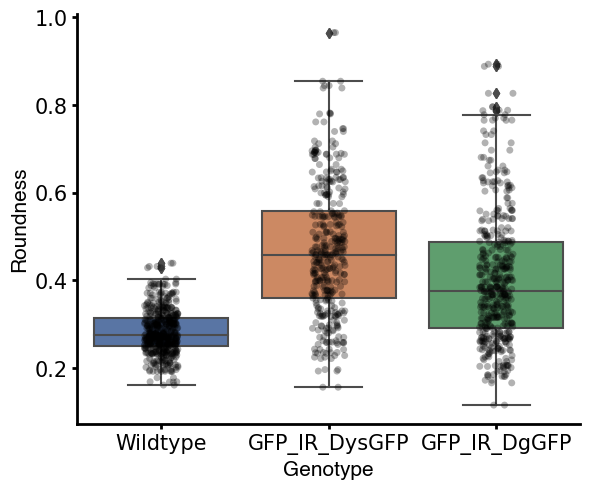

In [54]:
genotype_labels=['wild_type', 'GFP_IR_DysGFP', 'GFP_IR_DgGFP']

labels1=['Wildtype','GFP_IR_DysGFP', 'GFP_IR_DgGFP']

boxplot2('id', 'roundness', secondary_GFPs, 15, 'Roundness',1,'secondary_GFPs_roundness', genotype_labels, labels1) #PC1

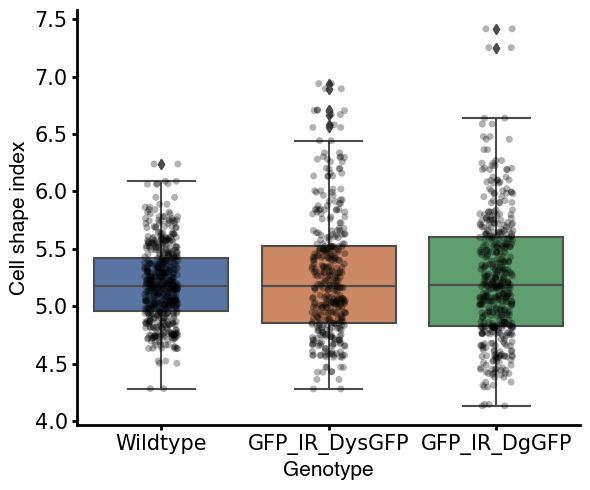

In [55]:
genotype_labels=['wild_type', 'GFP_IR_DysGFP', 'GFP_IR_DgGFP']

labels1=['Wildtype','GFP_IR_DysGFP', 'GFP_IR_DgGFP']

boxplot2('id', 'cell_shape_index', secondary_GFPs, 15, 'Cell shape index',1,'secondary_GFPs_CSI', genotype_labels, labels1) #PC1

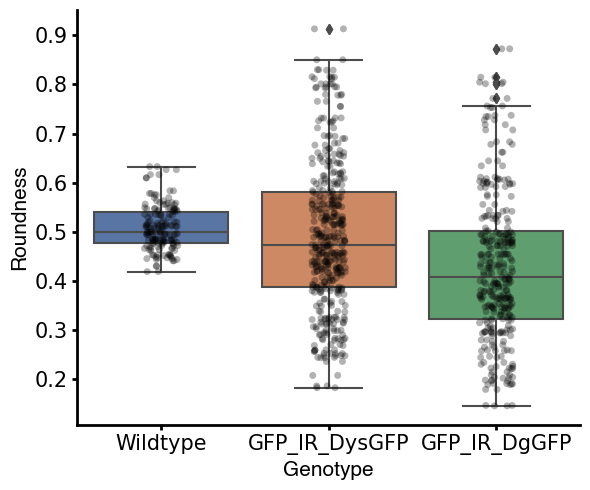

In [56]:
genotype_labels=['wild_type', 'GFP_IR_DysGFP', 'GFP_IR_DgGFP']

labels1=['Wildtype','GFP_IR_DysGFP', 'GFP_IR_DgGFP']

boxplot2('id', 'roundness', tertiary_GFPs, 15, 'Roundness',1,'tertiary_GFPs_roundness', genotype_labels, labels1) #PC1

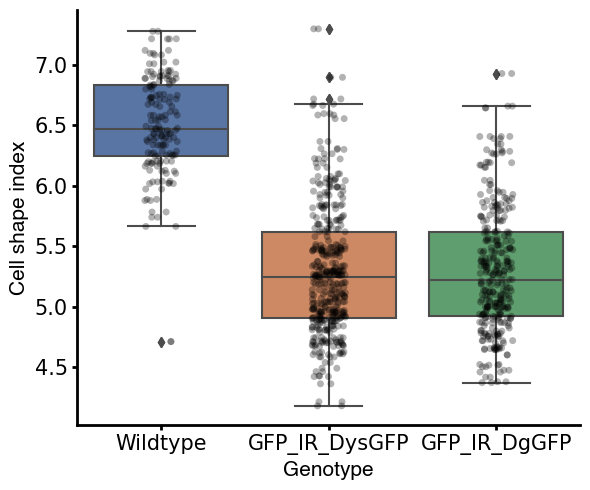

In [59]:
genotype_labels=['wild_type', 'GFP_IR_DysGFP', 'GFP_IR_DgGFP']

labels1=['Wildtype','GFP_IR_DysGFP', 'GFP_IR_DgGFP']

boxplot2('id', 'cell_shape_index', tertiary_GFPs, 15, 'Cell shape index',1,'tertiary_GFPs_CSI', genotype_labels, labels1) #PC1

# Break: Dys_IR/DysGFP

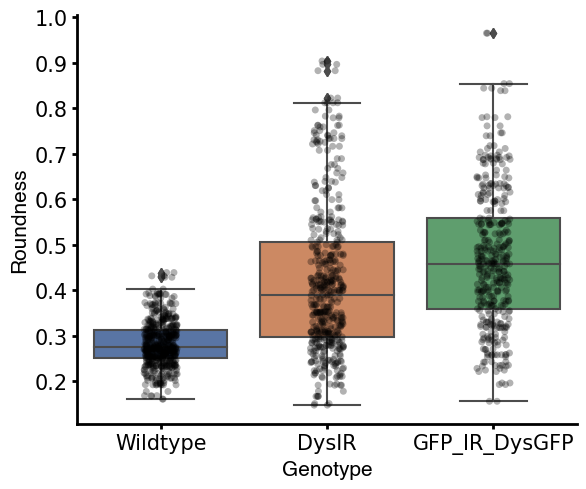

In [38]:
genotype_labels=['wild_type', 'Dys_IR', 'GFP_IR_DysGFP']

labels1=['Wildtype','DysIR', 'GFP_IR_DysGFP']

boxplot2('id', 'roundness', secondary_Dys, 15, 'Roundness',1,'secondary_Dys_roundness', genotype_labels, labels1) #PC1

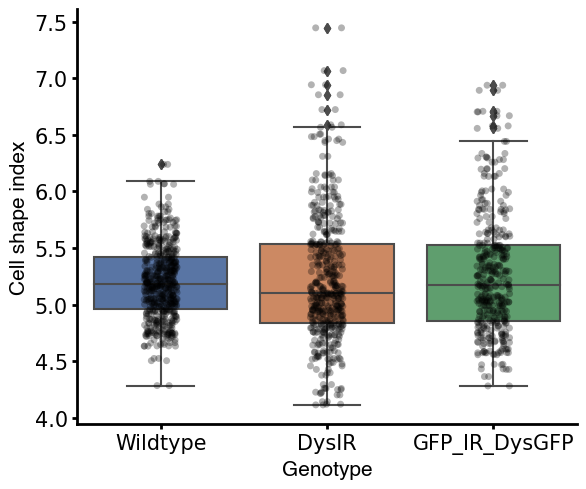

In [39]:
genotype_labels=['wild_type', 'Dys_IR', 'GFP_IR_DysGFP']

labels1=['Wildtype','DysIR', 'GFP_IR_DysGFP']

boxplot2('id', 'cell_shape_index', secondary_Dys, 15, 'Cell shape index',1,'secondary_Dys_CSI', genotype_labels, labels1) #PC1

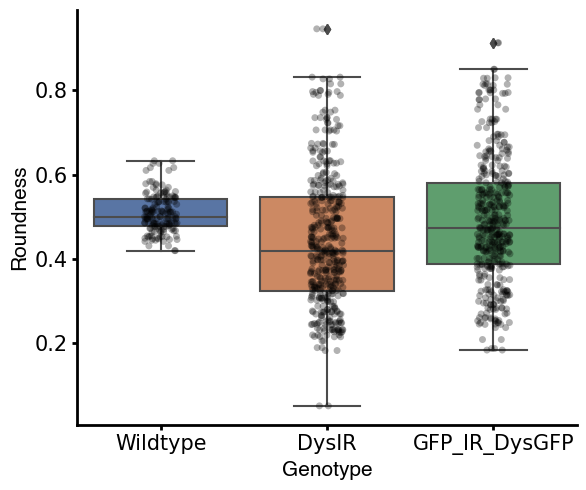

In [40]:
genotype_labels=['wild_type', 'Dys_IR', 'GFP_IR_DysGFP']

labels1=['Wildtype','DysIR', 'GFP_IR_DysGFP']

boxplot2('id', 'roundness', tertiary_Dys, 15, 'Roundness',1,'tertiary_Dys_roundness', genotype_labels, labels1) #PC1

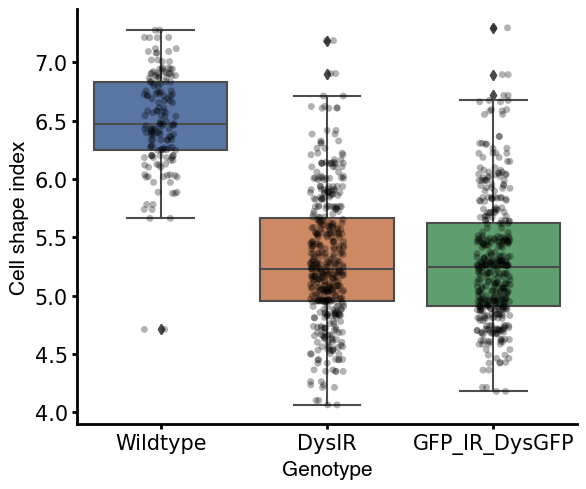

In [41]:
genotype_labels=['wild_type', 'Dys_IR', 'GFP_IR_DysGFP']

labels1=['Wildtype','DysIR', 'GFP_IR_DysGFP']

boxplot2('id', 'cell_shape_index', tertiary_Dys, 15, 'Cell shape index',1,'tertiary_Dys_CSI', genotype_labels, labels1) #PC1

# DysIR/DgIR

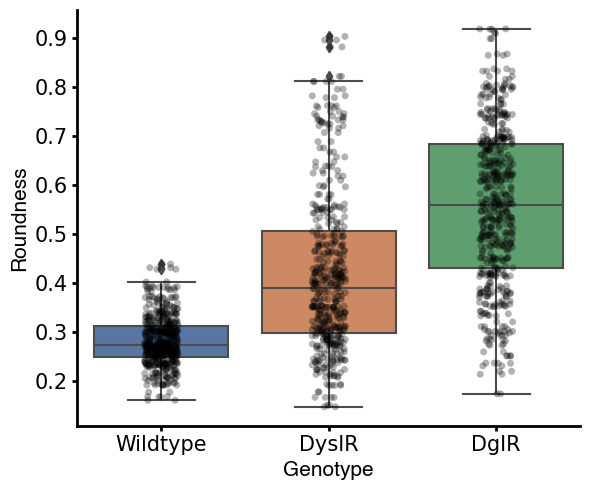

In [42]:
genotype_labels=['wild_type', 'Dys_IR', 'Dg_IR']

labels1=['Wildtype','DysIR', 'DgIR']

boxplot2('id', 'roundness', secondary_Dys_Dg, 15, 'Roundness',1,'secondary_DysIR_DgIR_roundness', genotype_labels, labels1) #PC1

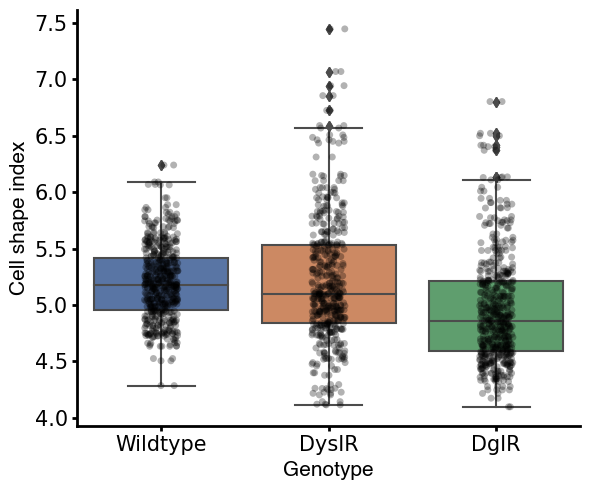

In [43]:
genotype_labels=['wild_type', 'Dys_IR', 'Dg_IR']

labels1=['Wildtype','DysIR', 'DgIR']

boxplot2('id', 'cell_shape_index', secondary_Dys_Dg, 15, 'Cell shape index',1,'secondary_DysIR_DgIR_CSI', genotype_labels, labels1) #PC1

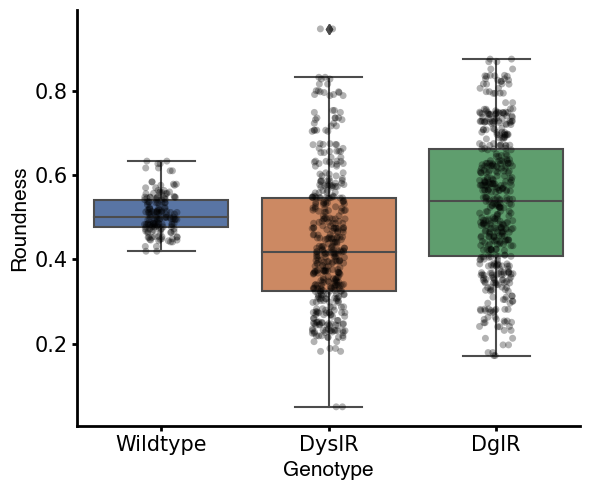

In [44]:
genotype_labels=['wild_type', 'Dys_IR', 'Dg_IR']

labels1=['Wildtype','DysIR', 'DgIR']

boxplot2('id', 'roundness', tertiary_Dys_Dg, 15, 'Roundness',1,'tertiary_DysIR_DgIR_roundness', genotype_labels, labels1) #PC1

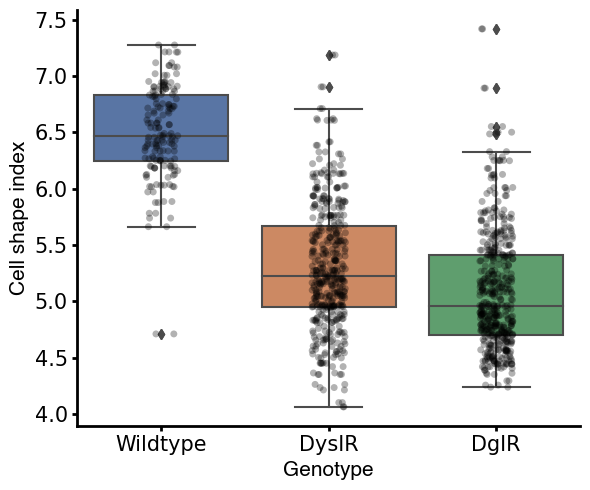

In [45]:
genotype_labels=['wild_type', 'Dys_IR', 'Dg_IR']

labels1=['Wildtype','DysIR', 'DgIR']

boxplot2('id', 'cell_shape_index', tertiary_Dys_Dg, 15, 'Cell shape index',1,'tertiary_DysIR_DgIR_CSI', genotype_labels, labels1) #PC1

# DgIR/DgGFP

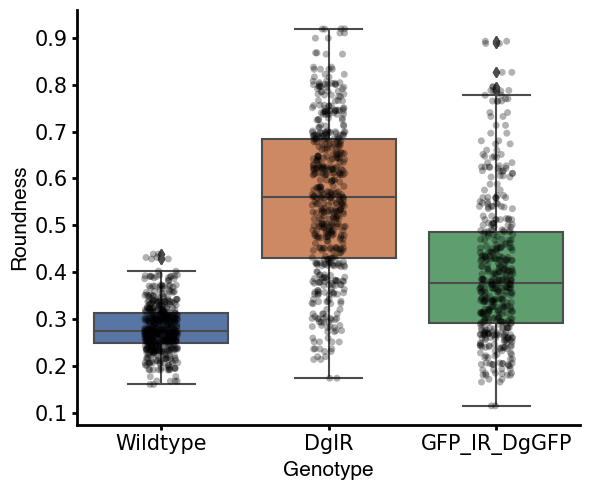

In [46]:
genotype_labels=['wild_type', 'Dg_IR', 'GFP_IR_DgGFP']

labels1=['Wildtype','DgIR', 'GFP_IR_DgGFP']

boxplot2('id', 'roundness', secondary_Dg, 15, 'Roundness',1,'secondary_DgIR_DgGFP_roundness', genotype_labels, labels1) #PC1

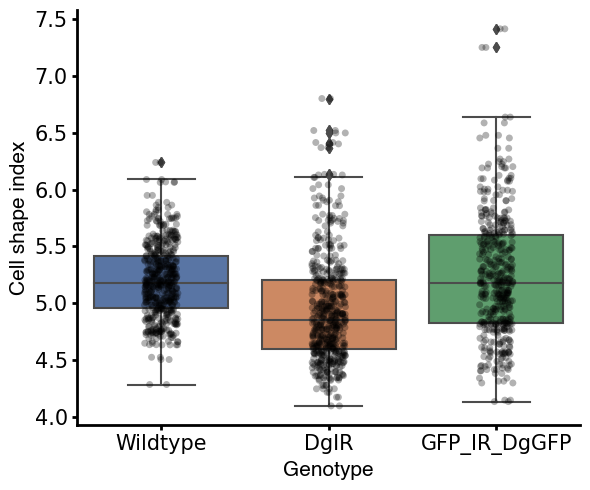

In [47]:
genotype_labels=['wild_type', 'Dg_IR', 'GFP_IR_DgGFP']

labels1=['Wildtype','DgIR', 'GFP_IR_DgGFP']

boxplot2('id', 'cell_shape_index', secondary_Dg, 15, 'Cell shape index',1,'secondary_DgIR_DgGFP_CSI', genotype_labels, labels1) #PC1

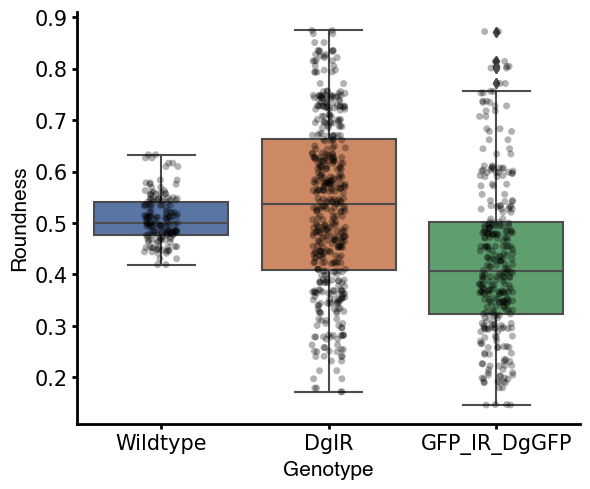

In [48]:
genotype_labels=['wild_type', 'Dg_IR', 'GFP_IR_DgGFP']

labels1=['Wildtype','DgIR', 'GFP_IR_DgGFP']

boxplot2('id', 'roundness', tertiary_Dg, 15, 'Roundness',1,'tertiary_DgIR_DgGFP_roundness', genotype_labels, labels1) #PC1

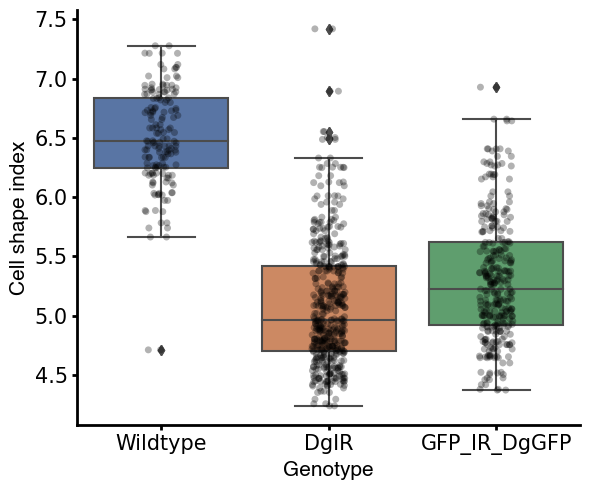

In [49]:
genotype_labels=['wild_type', 'Dg_IR', 'GFP_IR_DgGFP']

labels1=['Wildtype','DgIR', 'GFP_IR_DgGFP']

boxplot2('id', 'cell_shape_index', tertiary_Dg, 15, 'Cell shape index',1,'tertiary_DgIR_DgGFP_CSI', genotype_labels, labels1) #PC1